# **Exploratory Data Analysis for Netflix**

---





# Exploratory Data Analysis on popular video streaming website - Netflix. 

Original Data for this analysis is available at- https://www.kaggle.com/shivamb/netflix-shows

This notebook uses a cleaned version of the data with additional columns for the EDA (edited in Excel before importing).

These new columns are -

*  **running_time**- Numerical column created from the 'duration' column to estimate content time on the platform. duration with 'season' string has been ignored due to insufficient data on no. of episodes per season & running time per episode
*   **Decade** - Numerical column to group content decade wise
*   **Suggested_Viewer_Age**- Categorical Column for grouping content ratings since different countries have different notations for ratings Eg. TV-MA/R/NR/UR could be for Mature Audiences and not suitable for young viewers. Hence, these could be grouped as per age levels
*   **Audience group**- categorical column created from the 'Suggested_Viewer_Age' column values
*   **Genre_1, Genre_2 and Genre_3**- Categorical columns created from 'listed_in' column from original data as each show_id seems to have multiple tags



This analysis will try to answer the some/all of following questions:

1.  Are more TV shows being released than Movies? 
2.  Which country has the highest number of TV shows?
3.  Which country has the highest number of Movies?
4.  Which content rating has the highest number of releases?
5.  Which type of content is being released most?
6.  Has there been an effect of Pandemic on the type of content?
7.  How much content is there for kids? 
8.  Average Running time of the content on the platform
9.  Releases in Categories of content 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Devashree\Downloads\netflix.csv')

In [3]:
df.shape

(7787, 17)

In [4]:
df=df.drop(['director','cast'],axis=1)

In [5]:
df.head()

,show_id,type,title,country,date_added,release_year,Decade,rating,Suggested_Viewer_Age,Audience group,duration,running_time,genre_1,genre_2,genre_3
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,2020,TV-MA,17+,Adults,4 Seasons,0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,2010,TV-MA,17+,Adults,93 min,93,Dramas,International Movies,NaN
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,2010,R,17+,Adults,78 min,78,Horror Movies,International Movies,NaN
3,s4,Movie,9,United States,"November 16, 2017",2009,2000,PG-13,13+,Young Adults/Teens,80 min,80,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,s5,Movie,21,United States,"January 1, 2020",2008,2000,PG-13,13+,Young Adults/Teens,123 min,123,Dramas,NaN,NaN


In [6]:
#changing date_added column from object to datetime
df['date_added']=pd.to_datetime(df['date_added'])

In [7]:
df.dtypes

show_id                         object
type                            object
title                           object
country                         object
date_added              datetime64[ns]
release_year                     int64
Decade                           int64
rating                          object
Suggested_Viewer_Age            object
Audience group                  object
duration                        object
running_time                     int64
genre_1                         object
genre_2                         object
genre_3                         object
dtype: object

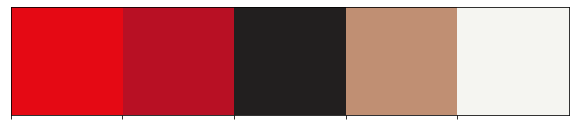

In [8]:
#color palette for this notebook
#using Netflix Brand Colors
colors = ['#E50914','#B81024','#221F1F',"#C08F73",'#F5F5F1']
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =2)
plt.show()

import missingno as msno
color=['#E50914']

#plot missing data
msno.bar(df,figsize=(10,4), color=color,fontsize=12,sort="ascending")

There are missing values in cast, country, director,rating columns.

The Data in genre_1, genre_2 and genre_3 have been split from the 'listed_in' column in the original file. As some show_ids have only one tag whereas some have more than 2 tags (max 3 tags) that is why we can ignore these even if the data is shown as missing in the plot.

In [9]:
#total running time of the content on the platform
time=df['running_time'].sum()
day=time/24
year=day/365

print("Netflix platform has content worth of about",round(year,1),"years","or",day,"days or",time,"mins")

Netflix platform has content worth of about 61.0 years or 22249.125 days or 533979 mins


In [10]:
#average running time
print("Average running time of the content is",round(df["running_time"].mean(axis=0),1),"mins")

Average running time of the content is 68.6 mins


In [11]:
#Top 5 countries by count of releases
df['title'].groupby(df['country']).count().sort_values(ascending=False).iloc[:5]

country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: title, dtype: int64

In [12]:
#Top 5 countries by count of releases for Movies
df[df['type'] == 'Movie'].groupby('type')['country'].value_counts().iloc[:5]

type   country       
Movie  United States     1850
       India              852
       United Kingdom     193
       Canada             118
       Egypt               89
Name: country, dtype: int64

In [13]:
#Top 5 countries by count of releases for TVshows
df[df['type'] == 'TV Show'].groupby('type')['country'].value_counts().iloc[:5]

type     country       
TV Show  United States     705
         United Kingdom    204
         Japan             157
         South Korea       147
         India              71
Name: country, dtype: int64

In [14]:
#create month from date_added
df['month'] = pd.DatetimeIndex(df['date_added']).month

#changing month numbers to string
df['month']=pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)
df.iloc[:2]

,show_id,type,title,country,date_added,release_year,Decade,rating,Suggested_Viewer_Age,Audience group,duration,running_time,genre_1,genre_2,genre_3,month
0,s1,TV Show,3%,Brazil,2020-08-14,2020,2020,TV-MA,17+,Adults,4 Seasons,0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Aug
1,s2,Movie,07:19,Mexico,2016-12-23,2016,2010,TV-MA,17+,Adults,93 min,93,Dramas,International Movies,NaN,Dec


In [15]:
# Top 5 months wrt content releases
df['date_added'].groupby(df['month']).count().sort_values(ascending=False).iloc[:5]

month
Dec    833
Oct    785
Jan    757
Nov    738
Mar    669
Name: date_added, dtype: int64

In [16]:
# Top 5 ratings by release year
df['show_id'].groupby(df['rating']).count().sort_values(ascending=False).iloc[:5]

rating
TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
Name: show_id, dtype: int64

In [17]:
# Audience ages
df['show_id'].groupby(df['Suggested_Viewer_Age']).count().sort_values(ascending=False).iloc[:5]


Suggested_Viewer_Age
17+         4337
13+         2564
Kids         280
7            271
All Ages     233
Name: show_id, dtype: int64

In [18]:
# Audience segments
aud=df['show_id'].groupby(df['Audience group']).count().sort_values(ascending=False)
aud

Audience group
Adults                4337
Young Adults/Teens    2564
All                    609
Kids                   277
Name: show_id, dtype: int64

In [19]:
!pip install pywaffle

In [20]:
from pywaffle import Waffle

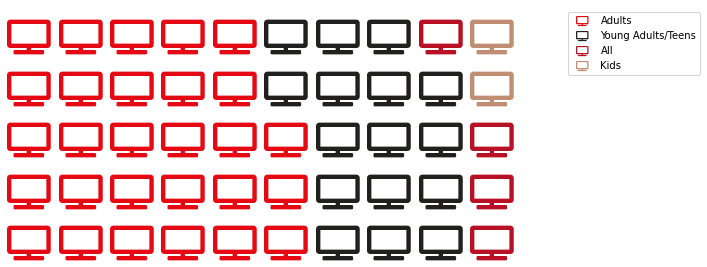

In [21]:
#Audience group: 

data = {'Adults': 4337,'Young Adults/Teens': 2564,'All': 609,'Kids':277}
fig = plt.figure(FigureClass=Waffle, 
    rows=5,
    columns=10, 
    values=data, 
    figsize=(10,6),
    colors=['#E50914','#221F1F','#B81024',"#C08F73"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    icons='tv',        
    font_size=35, 
    icon_legend=True
)
plt.show()

In [22]:
# Distribution of Content on platform by decade
df['show_id'].groupby(df['Decade']).count().sort_values(ascending=False)

Decade
2010    5711
2020     899
2000     728
1990     225
1980     106
1970      67
1960      25
1940      14
1950      11
1920       1
Name: show_id, dtype: int64

In [23]:
#Content in 2010 decade vs 2000
print("Increase in content for 2010 decade vs previous decade 2000 is",round((5711-728)/728*100,0),"%")

Increase in content for 2010 decade vs previous decade 2000 is 684.0 %


In [24]:
pd.unique(df[['genre_1', 'genre_2','genre_3']].values.ravel('K'))

array(['International TV Shows', 'Dramas', 'Horror Movies',
       'Action & Adventure', 'Crime TV Shows', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Docuseries', 'Movies',
       'British TV Shows', 'International Movies', 'Sci-Fi & Fantasy',
       "Kids' TV", 'Children & Family Movies', 'TV Shows',
       'Classic Movies', 'Thrillers', 'Stand-Up Comedy & Talk Shows',
       'Stand-Up Comedy', 'Anime Features', 'Music & Musicals',
       'TV Dramas', 'TV Horror', 'TV Action & Adventure',
       'Classic & Cult TV', 'Romantic TV Shows', 'Cult Movies',
       'TV Sci-Fi & Fantasy', 'Romantic Movies',
       'Spanish-Language TV Shows', 'LGBTQ Movies', nan,
       'Science & Nature TV', 'Korean TV Shows', 'Faith & Spirituality',
       'Teen TV Shows', 'TV Mysteries', 'TV Thrillers'], dtype=object)

In [25]:
df_cat=pd.DataFrame(pd.unique(df[['genre_1', 'genre_2','genre_3']].values.ravel('K')))
#rename empty column
df_1=df_cat.rename(columns = {0 : "Genre"})
#dropna 
df_1.dropna(inplace=True)
df_1.iloc[:5]

,Genre
0,International TV Shows
1,Dramas
2,Horror Movies
3,Action & Adventure
4,Crime TV Shows


In [26]:
#Content Categories
df_1.nunique()

Genre    42
dtype: int64

In [27]:
df['type'].groupby(df['type']).count()

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:ylabel='release_year'>

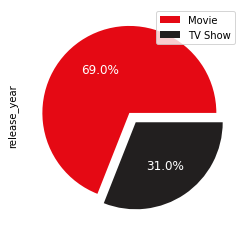

In [28]:
# Distribution of Content on platform
explode = [0.03,0.1]
df.groupby(['type']).sum().plot(kind='pie', y='release_year',explode = explode,autopct='%1.1f%%',colors=['#E50914','#221F1F'],textprops={'color':"w",'size':"large"})

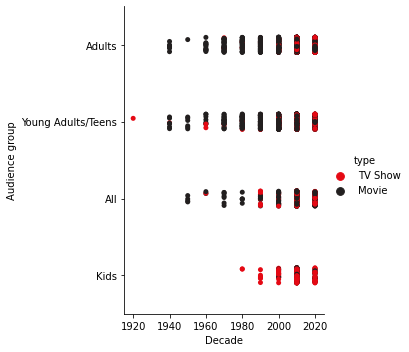

In [29]:
#decadewise content for audiences
sns.catplot(y="Audience group", x="Decade", data=df,palette=['#E50914','#221F1F'],hue='type')

<AxesSubplot:xlabel='count', ylabel='Audience group'>

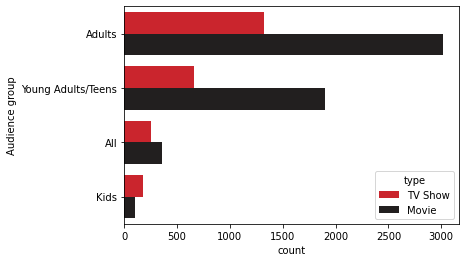

In [30]:
#typewise content for audiences
sns.countplot(y="Audience group", data=df,palette=['#E50914','#221F1F'],hue='type')

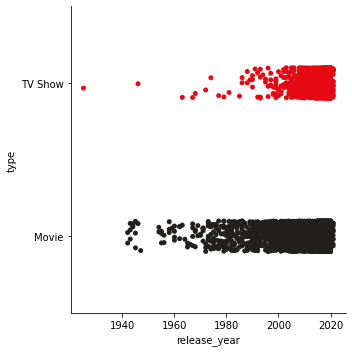

In [31]:
sns.catplot(y="type", x="release_year", data=df,palette=['#E50914','#221F1F'])

Based on the above EDA, here's what we can conclude


1.   United States has the highest count for content, both Movies and TV shows
2.   Netflix platform has content running time lasting upto 61 years!(533979 mins), average running time of the content is about 69 mins
3.   2010 decade has the most content count and that is 684% higher than the previous decade 2000
4.   UK has more number of TV shows than Movies
5. TV shows became popular after 2000
6. More TV shows released as compared to Movies in the Pandemic time as people stayed indoors
7. Adults have the most selection for Movies and TV shows
8. Less than 10% content is suitable for All (Kids/Family viewing)
9. More than 55% of the total content is suitable for Mature Audiences




